<a href="https://colab.research.google.com/github/rayees-codes/Capstone-3-Rayees-Cell-Images-Classification/blob/main/Capstone_3_Full_notebook_RAYEES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone 3 - Cell Images Classification - Infected (Parasitized) or Uninfected

Completed by: Angela Dunston


**Dataset Info:**

Kaggle Data Repo - https://www.kaggle.com/brsdincer/cell-images-parasitized-or-not

Data can be downloaded from the above linked page. Originally deposited by [Baris Dincer](https://www.kaggle.com/brsdincer) in Kaggle datasets page. It contains more than 10000 images to train and test to identify the infected and uninfected class of images. 


## Contents
* Introduction
* PART 1: Data Wrangling and EDA

  * 1.1 Importing packages and libraries
  * 1.2 Setting the path and labels
  * 1.3 Coverting to series 
  * 1.4 Converting to dataframe


## Introduction

**Problem statement:**

Predicting the parasite infected and uninfected cells from microscopic images

**Context:**

Infectious diseases such as malaria, dengue are caused by parasites like viruses. After infection, the patient's cells start spreading these parasites all over the body. Once the body cells are infected with parasites, that is called ‘parasitized’ or ‘infected’ cells. Other hand, the cells that are not infected with parasites are called ‘uninfected’. So, it is crucial to detect these infected (parasitized) cells before they cause serious illness to patients. We can identify these infected cells using their images which are stained with chemical dyes. 

Generally, two types of dyes are used to identify the ‘infected’ and ‘uninfected’ cells: 1. eosin (pink) and 2. hematoxylin (blue). Simply to understand, the images which contain the blue stains are infected with parasites, whereas cell images containing only pink are classified as uninfected cells. Here, we aim to classify the infected and uninfected images by training more than 10000 images that will help in predicting the right class upon testing.

**Criteria for success:**

* Labeling, feature extraction and training the two classes of images

* Building and testing a reliable model that can predict the infected images with high performance metrics


## PART I: Data wrangling and EDA

### Importing packages and libraries

In [8]:
#GENERAL 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [9]:
#PATH PROCESS
import os
os.sys.path
from pathlib import Path
import glob

In [10]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [11]:
import cv2

In [12]:
#IMAGE PROCESS
!pip install tensorflow
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image

In [46]:
!pip install opendatasets

     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/82.7 kB ? eta -:--:--
     -------------- ----------------------- 30.7/82.7 kB 325.1 kB/s eta 0:00:01
     ---------------------------- --------- 61.4/82.7 kB 544.7 kB/s eta 0:00:01
     -------------------------------------- 82.7/82.7 kB 579.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105796 sha256=f54d95aa5069ef4dec63631b38d74f7e05036e263790e37bec8ba74c2ad8365d
  Stored in directory: c:\users\ak5du\appdata\local\pip\cache\wheels\ff\55\fb\b27a466be754d2a06ffe0e37b248d844f090a63b51becea85d
Successfully built kaggle


In [50]:
import opendatasets as od
import pandas
od.download(
"https://www.kaggle.com/datasets/brsdincer/cell-images-parasitized-or-not?resource=download&select=cell_images")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  angelafutrelldunston


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/brsdincer/cell-images-parasitized-or-not


100%|██████████| 338M/338M [00:15<00:00, 23.0MB/s] 


### Setting the path and labels

**Main Path**

In [54]:
Main_Train_Path = Path(r".\cell-images-parasitized-or-not/cell_images/train")
Main_Test_Path = Path(r".\cell-images-parasitized-or-not/cell_images/test")

**PNG Path**

In [56]:
Train_PNG_Path = list(Main_Train_Path.glob(r"*/*.png"))
Test_PNG_Path = list(Main_Test_Path.glob(r"*/*.png"))

In [58]:
print(Train_PNG_Path[0:5])

[WindowsPath('cell-images-parasitized-or-not/cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'), WindowsPath('cell-images-parasitized-or-not/cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png'), WindowsPath('cell-images-parasitized-or-not/cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png'), WindowsPath('cell-images-parasitized-or-not/cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_165.png'), WindowsPath('cell-images-parasitized-or-not/cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_166.png')]


In [60]:
print(Test_PNG_Path[0:5])

[WindowsPath('cell-images-parasitized-or-not/cell_images/test/parasitized/C100P61ThinF_IMG_20150918_144348_cell_144.png'), WindowsPath('cell-images-parasitized-or-not/cell_images/test/parasitized/C100P61ThinF_IMG_20150918_145422_cell_165.png'), WindowsPath('cell-images-parasitized-or-not/cell_images/test/parasitized/C100P61ThinF_IMG_20150918_145609_cell_145.png'), WindowsPath('cell-images-parasitized-or-not/cell_images/test/parasitized/C100P61ThinF_IMG_20150918_145609_cell_149.png'), WindowsPath('cell-images-parasitized-or-not/cell_images/test/parasitized/C100P61ThinF_IMG_20150918_145609_cell_150.png')]


**Labels**

In [62]:
Train_PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Train_PNG_Path))

In [64]:
print("Parasitized: ",Train_PNG_Labels.count("parasitized"))
print("Uninfected: ",Train_PNG_Labels.count("uninfected"))

Parasitized:  12479
Uninfected:  12479


In [66]:
Test_PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Test_PNG_Path))

In [68]:
print("Parasitized: ",Test_PNG_Labels.count("parasitized"))
print("Uninfected: ",Test_PNG_Labels.count("uninfected"))

Parasitized:  1300
Uninfected:  1300


**Converting to Series**

In [70]:
Train_PNG_Path_Series = pd.Series(Train_PNG_Path,name="PNG").astype(str)
Train_PNG_Labels_Series = pd.Series(Train_PNG_Labels,name="CATEGORY")

In [72]:
Test_PNG_Path_Series = pd.Series(Test_PNG_Path,name="PNG").astype(str)
Test_PNG_Labels_Series = pd.Series(Test_PNG_Labels,name="CATEGORY")

**Converting to DataFrame**

In [74]:
Main_Train_Data = pd.concat([Train_PNG_Path_Series,Train_PNG_Labels_Series],axis=1)

In [76]:
print(Main_Train_Data.head(-1))

                                                     PNG     CATEGORY
0      cell-images-parasitized-or-not\cell_images\tra...  parasitized
1      cell-images-parasitized-or-not\cell_images\tra...  parasitized
2      cell-images-parasitized-or-not\cell_images\tra...  parasitized
3      cell-images-parasitized-or-not\cell_images\tra...  parasitized
4      cell-images-parasitized-or-not\cell_images\tra...  parasitized
...                                                  ...          ...
24952  cell-images-parasitized-or-not\cell_images\tra...   uninfected
24953  cell-images-parasitized-or-not\cell_images\tra...   uninfected
24954  cell-images-parasitized-or-not\cell_images\tra...   uninfected
24955  cell-images-parasitized-or-not\cell_images\tra...   uninfected
24956  cell-images-parasitized-or-not\cell_images\tra...   uninfected

[24957 rows x 2 columns]


In [78]:
Main_Test_Data = pd.concat([Test_PNG_Path_Series,Test_PNG_Labels_Series],axis=1)

In [80]:
print(Main_Test_Data.head(-1))

                                                    PNG     CATEGORY
0     cell-images-parasitized-or-not\cell_images\tes...  parasitized
1     cell-images-parasitized-or-not\cell_images\tes...  parasitized
2     cell-images-parasitized-or-not\cell_images\tes...  parasitized
3     cell-images-parasitized-or-not\cell_images\tes...  parasitized
4     cell-images-parasitized-or-not\cell_images\tes...  parasitized
...                                                 ...          ...
2594  cell-images-parasitized-or-not\cell_images\tes...   uninfected
2595  cell-images-parasitized-or-not\cell_images\tes...   uninfected
2596  cell-images-parasitized-or-not\cell_images\tes...   uninfected
2597  cell-images-parasitized-or-not\cell_images\tes...   uninfected
2598  cell-images-parasitized-or-not\cell_images\tes...   uninfected

[2599 rows x 2 columns]


### Exploratory Data Analysis
**Shuffling the DataFrame** 

In [82]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)

In [84]:
print(Main_Train_Data.head(-1))

                                                     PNG     CATEGORY
0      cell-images-parasitized-or-not\cell_images\tra...   uninfected
1      cell-images-parasitized-or-not\cell_images\tra...  parasitized
2      cell-images-parasitized-or-not\cell_images\tra...  parasitized
3      cell-images-parasitized-or-not\cell_images\tra...  parasitized
4      cell-images-parasitized-or-not\cell_images\tra...  parasitized
...                                                  ...          ...
24952  cell-images-parasitized-or-not\cell_images\tra...  parasitized
24953  cell-images-parasitized-or-not\cell_images\tra...  parasitized
24954  cell-images-parasitized-or-not\cell_images\tra...  parasitized
24955  cell-images-parasitized-or-not\cell_images\tra...  parasitized
24956  cell-images-parasitized-or-not\cell_images\tra...  parasitized

[24957 rows x 2 columns]


In [86]:
Main_Test_Data = Main_Test_Data.sample(frac=1).reset_index(drop=True)

In [88]:
print(Main_Test_Data.head(-1))

                                                    PNG     CATEGORY
0     cell-images-parasitized-or-not\cell_images\tes...  parasitized
1     cell-images-parasitized-or-not\cell_images\tes...  parasitized
2     cell-images-parasitized-or-not\cell_images\tes...  parasitized
3     cell-images-parasitized-or-not\cell_images\tes...   uninfected
4     cell-images-parasitized-or-not\cell_images\tes...   uninfected
...                                                 ...          ...
2594  cell-images-parasitized-or-not\cell_images\tes...   uninfected
2595  cell-images-parasitized-or-not\cell_images\tes...   uninfected
2596  cell-images-parasitized-or-not\cell_images\tes...   uninfected
2597  cell-images-parasitized-or-not\cell_images\tes...  parasitized
2598  cell-images-parasitized-or-not\cell_images\tes...   uninfected

[2599 rows x 2 columns]


### Image visualization

In [90]:
plt.style.use("classic")

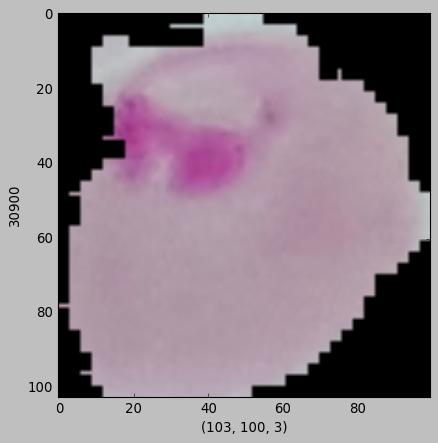

In [92]:
E_IMG = cv2.imread(Main_Train_Data["PNG"][11000])
plt.xlabel(E_IMG.shape)
plt.ylabel(E_IMG.size)
plt.imshow(E_IMG)

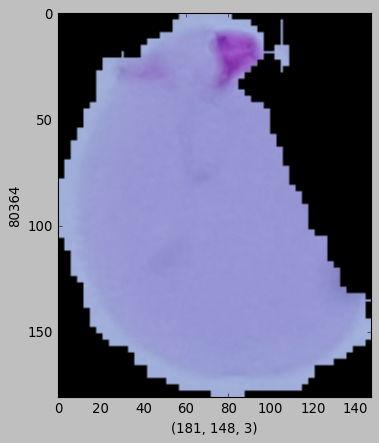

In [94]:
E_IMG = cv2.imread(Main_Train_Data["PNG"][70])
plt.xlabel(E_IMG.shape)
plt.ylabel(E_IMG.size)
plt.imshow(E_IMG)

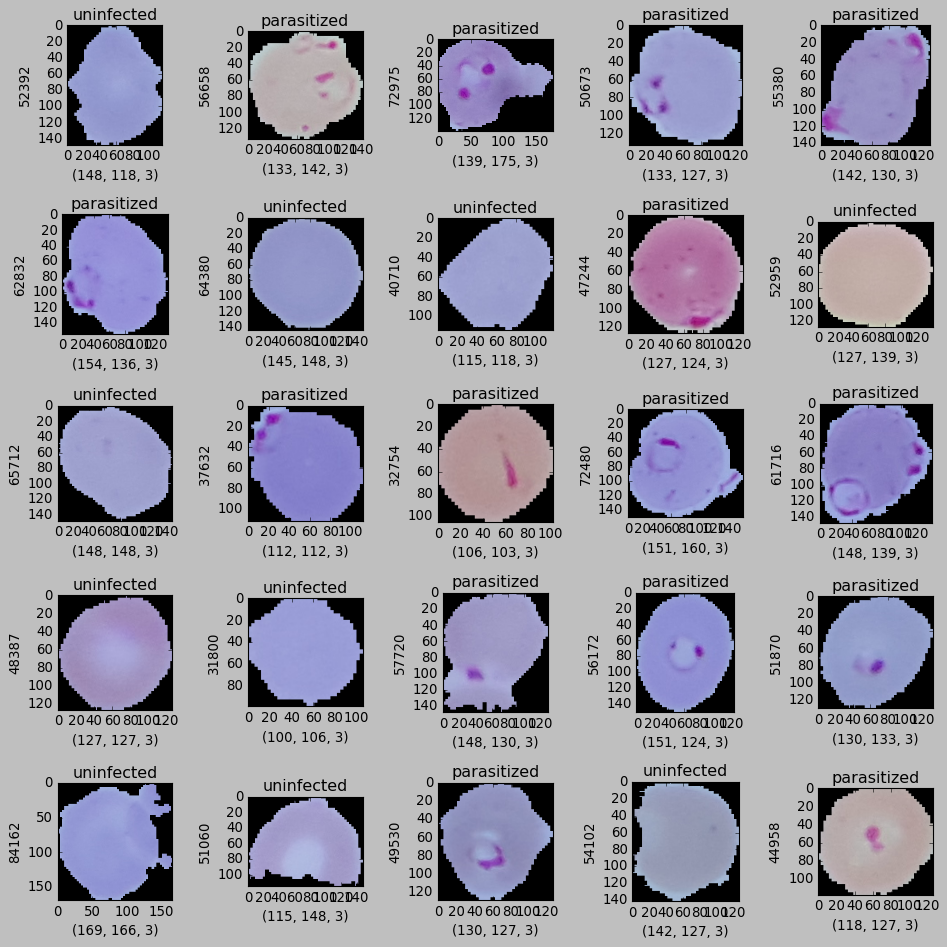

In [96]:
figure, axis = plt.subplots(nrows=5, ncols=5, figsize=(12,12))

for i, ax in enumerate(axis.flat):
  IMG = cv2.imread(Main_Train_Data["PNG"][i])
  ax.set_xlabel(IMG.shape)
  ax.set_ylabel(IMG.size)
  ax.set_title(Main_Train_Data["CATEGORY"][i])
  ax.imshow(IMG, cmap="Greys_r")
plt.tight_layout()
plt.show()

**Image Edge Detection**

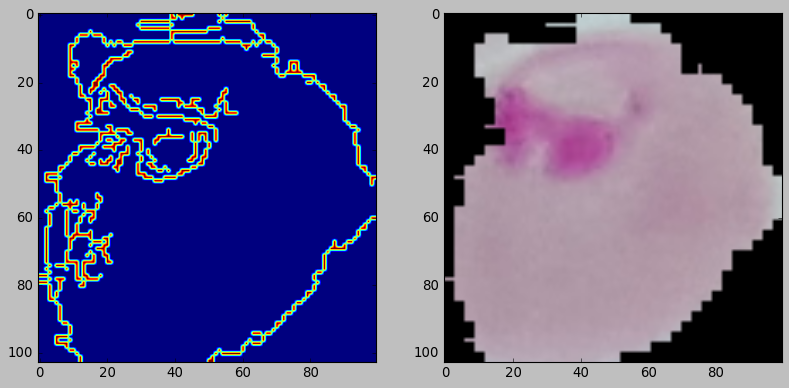

In [98]:
figure, axis = plt.subplots(nrows=1, ncols=2, figsize=(12,12))

E_IMG = cv2.imread(Main_Train_Data["PNG"][11000])
C_IMG = cv2.Canny(E_IMG, 10, 100)

axis[0].imshow(C_IMG)
axis[1].imshow(E_IMG)

**Image Thresholding**

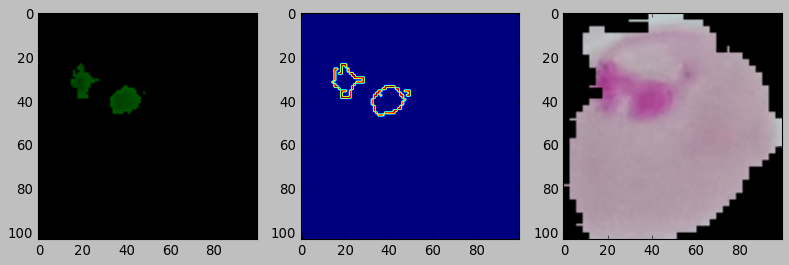

In [100]:
figure, axis = plt.subplots(nrows=1, ncols=3, figsize=(12,12))

E_IMG = cv2.imread(Main_Train_Data["PNG"][11000])
_, T_IMG = cv2.threshold(E_IMG, 90, 155, cv2.THRESH_TOZERO_INV)
C_IMG = cv2.Canny(T_IMG, 10, 100)

axis[0].imshow(T_IMG)
axis[1].imshow(C_IMG)
axis[2].imshow(E_IMG)

**Finding Contours**

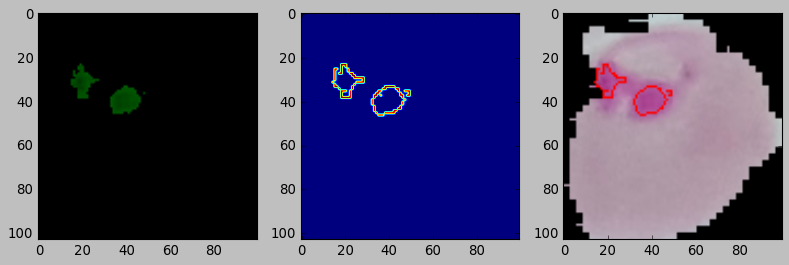

In [102]:
figure, axis = plt.subplots(nrows=1, ncols=3, figsize=(12,12))

E_IMG = cv2.imread(Main_Train_Data["PNG"][11000])
_, T_IMG = cv2.threshold(E_IMG, 90, 155, cv2.THRESH_TOZERO_INV)
C_IMG = cv2.Canny(T_IMG, 10, 100)

contours, _ = cv2.findContours(C_IMG, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
Draw_Contour = cv2.drawContours(E_IMG, contours, -1, (255,0,0), 1)

axis[0].imshow(T_IMG)
axis[1].imshow(C_IMG)
axis[2].imshow(Draw_Contour)

**Bounding rectangle**

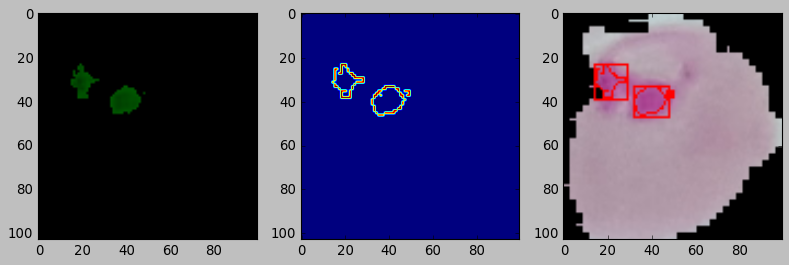

In [104]:
figure, axis = plt.subplots(nrows=1, ncols=3, figsize=(12,12))

for contour in contours:
  x,y,w,h = cv2.boundingRect(contour)
  cv2.rectangle(Draw_Contour, (x,y), (x+w, y+h), (255,0,0), 1)

axis[0].imshow(T_IMG)
axis[1].imshow(C_IMG)
axis[2].imshow(E_IMG)

**Combining all steps and checking on another image**

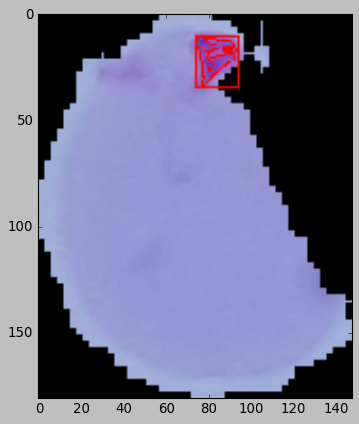

In [106]:
# Loding the image indexed at 18000
E_IMG2 = cv2.imread(Main_Train_Data["PNG"][70]) 

# Threshold
_, T_IMG2 = cv2.threshold(E_IMG2, 90, 155, cv2.THRESH_TOZERO_INV)

# Edge detection
C_IMG2 = cv2.Canny(T_IMG2, 10, 100)

# Finding contours
contours2, _ = cv2.findContours(C_IMG2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
Draw_Contour2 = cv2.drawContours(E_IMG2, contours2, -1, (255,0,0), 1)

# Drawing rectangle around contour
for contour in contours2:
  x,y,w,h = cv2.boundingRect(contour)
  cv2.rectangle(Draw_Contour2, (x,y), (x+w, y+h), (255,0,0), 1)

plt.imshow(E_IMG2)

### Subsetting the dataframe into 'Parasitized' and 'Uninfected' sets

In [108]:
Parasitized_Set = Main_Train_Data[Main_Train_Data["CATEGORY"] == "parasitized"]
Parasitized_Set = Parasitized_Set.reset_index()
print(Parasitized_Set.head(-1)) 

       index                                                PNG     CATEGORY
0          1  cell-images-parasitized-or-not\cell_images\tra...  parasitized
1          2  cell-images-parasitized-or-not\cell_images\tra...  parasitized
2          3  cell-images-parasitized-or-not\cell_images\tra...  parasitized
3          4  cell-images-parasitized-or-not\cell_images\tra...  parasitized
4          5  cell-images-parasitized-or-not\cell_images\tra...  parasitized
...      ...                                                ...          ...
12473  24950  cell-images-parasitized-or-not\cell_images\tra...  parasitized
12474  24952  cell-images-parasitized-or-not\cell_images\tra...  parasitized
12475  24953  cell-images-parasitized-or-not\cell_images\tra...  parasitized
12476  24954  cell-images-parasitized-or-not\cell_images\tra...  parasitized
12477  24955  cell-images-parasitized-or-not\cell_images\tra...  parasitized

[12478 rows x 3 columns]


In [110]:
Uninfected_Set = Main_Train_Data[Main_Train_Data["CATEGORY"] == "uninfected"]
Uninfected_Set = Uninfected_Set.reset_index()
print(Uninfected_Set.head(-1))

       index                                                PNG    CATEGORY
0          0  cell-images-parasitized-or-not\cell_images\tra...  uninfected
1          6  cell-images-parasitized-or-not\cell_images\tra...  uninfected
2          7  cell-images-parasitized-or-not\cell_images\tra...  uninfected
3          9  cell-images-parasitized-or-not\cell_images\tra...  uninfected
4         10  cell-images-parasitized-or-not\cell_images\tra...  uninfected
...      ...                                                ...         ...
12473  24937  cell-images-parasitized-or-not\cell_images\tra...  uninfected
12474  24945  cell-images-parasitized-or-not\cell_images\tra...  uninfected
12475  24946  cell-images-parasitized-or-not\cell_images\tra...  uninfected
12476  24948  cell-images-parasitized-or-not\cell_images\tra...  uninfected
12477  24951  cell-images-parasitized-or-not\cell_images\tra...  uninfected

[12478 rows x 3 columns]


**Image process test on subsetted dataframes**

**Parasitized Set**

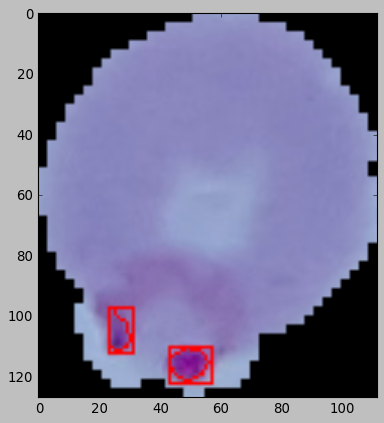

In [112]:
# Loding the image indexed at 52
E_IMG_P1 = cv2.imread(Parasitized_Set["PNG"][520]) 

# Threshold
_, T_IMG_P1 = cv2.threshold(E_IMG_P1, 90, 155, cv2.THRESH_TOZERO_INV)

# Edge detection
C_IMG_P1 = cv2.Canny(T_IMG_P1, 10, 100)

# Finding contours
contoursP1, _ = cv2.findContours(C_IMG_P1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
Draw_ContourP1 = cv2.drawContours(E_IMG_P1, contoursP1, -1, (255,0,0), 1)

# Drawing rectangle around contour
for contour in contoursP1:
  x,y,w,h = cv2.boundingRect(contour)
  cv2.rectangle(Draw_ContourP1, (x,y), (x+w, y+h), (255,0,0), 1)

plt.imshow(E_IMG_P1)

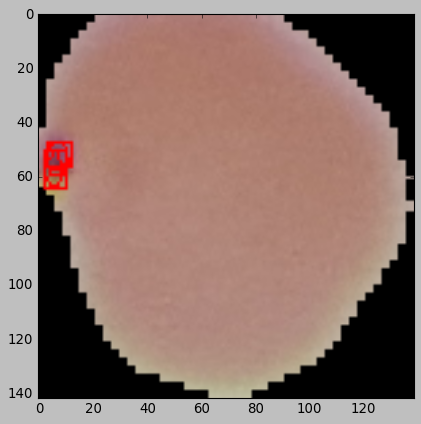

In [114]:
# Loding the image indexed at 1000
E_IMG_P2 = cv2.imread(Parasitized_Set["PNG"][1000]) 

# Threshold
_, T_IMG_P2 = cv2.threshold(E_IMG_P2, 90, 155, cv2.THRESH_TOZERO_INV)

# Edge detection
C_IMG_P2 = cv2.Canny(T_IMG_P2, 10, 100)

# Finding contours
contoursP2, _ = cv2.findContours(C_IMG_P2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
Draw_ContourP2 = cv2.drawContours(E_IMG_P2, contoursP2, -1, (255,0,0), 1)

# Drawing rectangle around contour
for contour in contoursP2:
  x,y,w,h = cv2.boundingRect(contour)
  cv2.rectangle(Draw_ContourP2, (x,y), (x+w, y+h), (255,0,0), 1)

plt.imshow(E_IMG_P2)

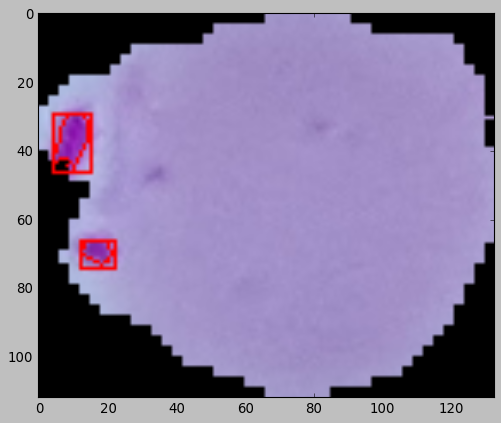

In [116]:
# Loding the image indexed at 11000
E_IMG_P3 = cv2.imread(Parasitized_Set["PNG"][10000]) 

# Threshold
_, T_IMG_P3 = cv2.threshold(E_IMG_P3, 90, 155, cv2.THRESH_TOZERO_INV)

# Edge detection
C_IMG_P3 = cv2.Canny(T_IMG_P3, 10, 100)

# Finding contours
contoursP3, _ = cv2.findContours(C_IMG_P3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
Draw_ContourP3 = cv2.drawContours(E_IMG_P3, contoursP3, -1, (255,0,0), 1)

# Drawing rectangle around contour
for contour in contoursP3:
  x,y,w,h = cv2.boundingRect(contour)
  cv2.rectangle(Draw_ContourP3, (x,y), (x+w, y+h), (255,0,0), 1)

plt.imshow(E_IMG_P3)

### Applying to all images

**Parasitized Set**

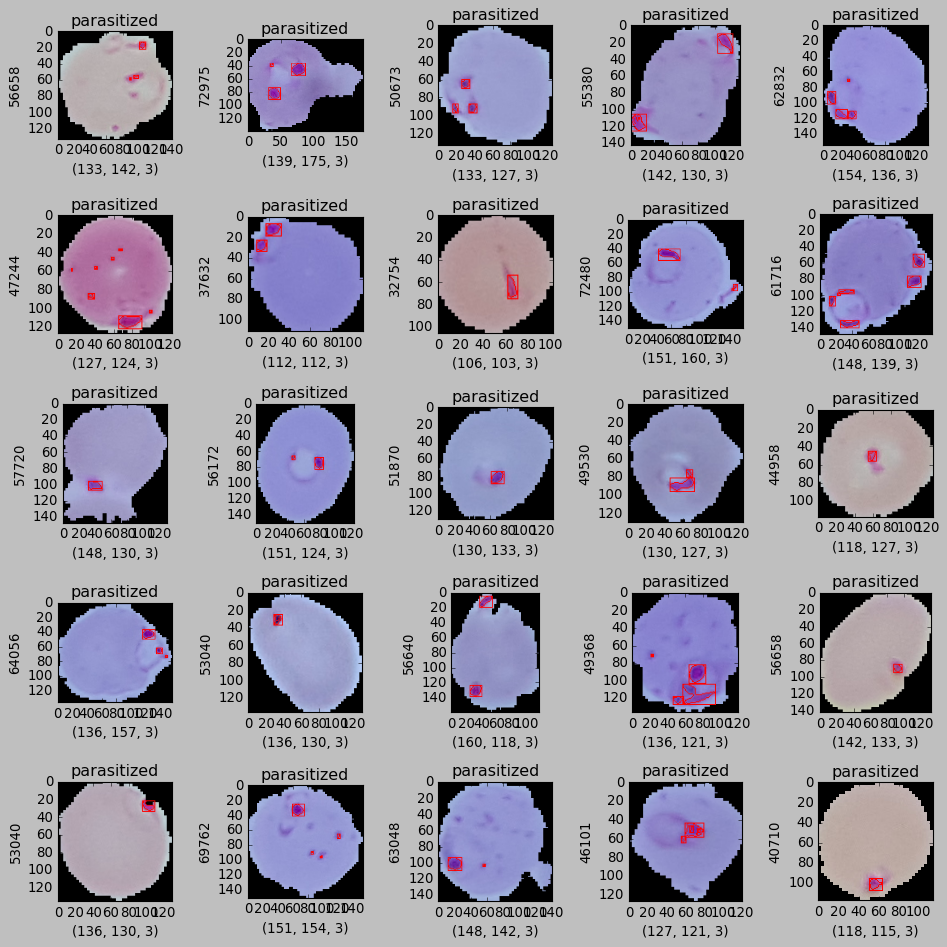

In [118]:
figure, axis = plt.subplots(nrows=5, ncols=5, figsize=(12,12))

for i, ax in enumerate(axis.flat):
  E_IMG_PL = cv2.imread(Parasitized_Set["PNG"][i])
  _, T_IMG_PL = cv2.threshold(E_IMG_PL, 90, 155, cv2.THRESH_TOZERO_INV)
  C_IMG_PL = cv2.Canny(T_IMG_PL, 10, 100)
  contoursPL, _ = cv2.findContours(C_IMG_PL, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  Draw_ContourPL = cv2.drawContours(E_IMG_PL, contoursPL, -1, (255,0,0), 1)

  for contour in contoursPL:
    x,y,w,h = cv2.boundingRect(contour)
    cv2.rectangle(Draw_ContourPL, (x,y), (x+w, y+h), (255,0,0), 1)

  ax.set_xlabel(E_IMG_PL.shape)
  ax.set_ylabel(E_IMG_PL.size)
  ax.set_title(Parasitized_Set["CATEGORY"][i])
  ax.imshow(E_IMG_PL, cmap="Greys_r")

plt.tight_layout()
plt.show()

**Uninfected Set**

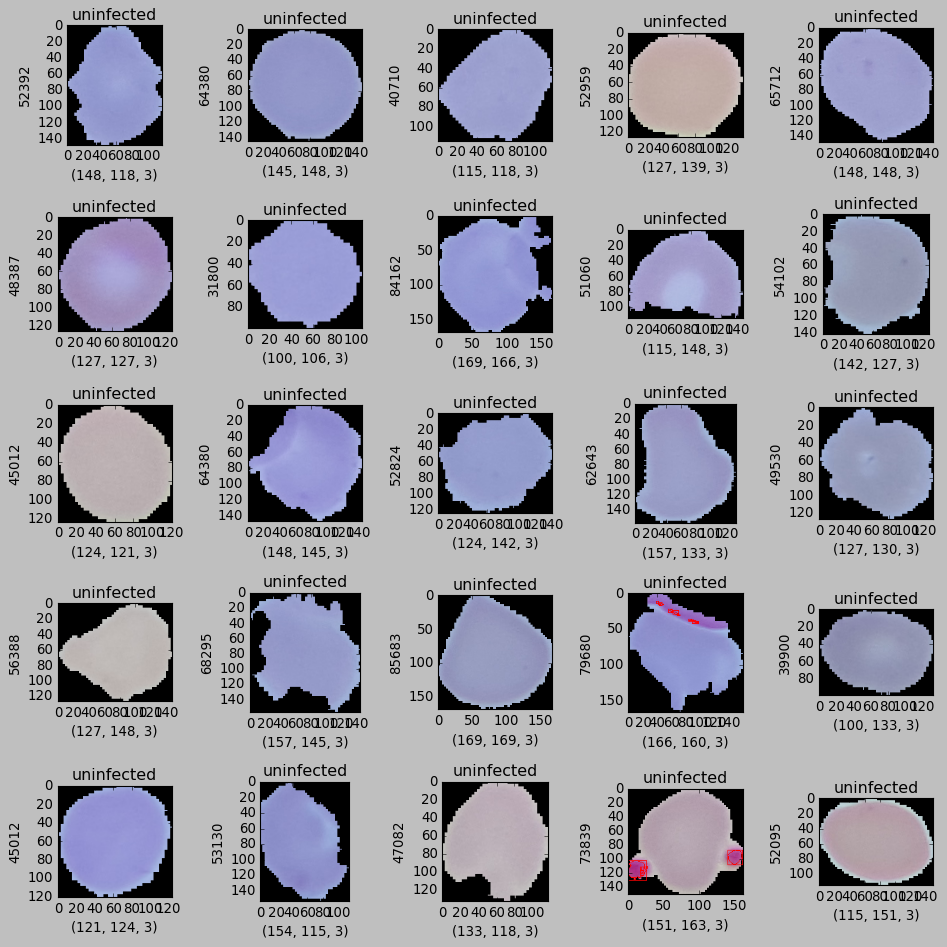

In [120]:
figure, axis = plt.subplots(nrows=5, ncols=5, figsize=(12,12))

for i, ax in enumerate(axis.flat):
  E_IMG_UL = cv2.imread(Uninfected_Set["PNG"][i])
  _, T_IMG_UL = cv2.threshold(E_IMG_UL, 90, 155, cv2.THRESH_TOZERO_INV)
  C_IMG_UL = cv2.Canny(T_IMG_UL, 10, 100)
  contoursUL, _ = cv2.findContours(C_IMG_UL, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  Draw_ContourUL = cv2.drawContours(E_IMG_UL, contoursUL, -1, (255,0,0), 1)

  for contour in contoursUL:
    x,y,w,h = cv2.boundingRect(contour)
    cv2.rectangle(Draw_ContourUL, (x,y), (x+w, y+h), (255,0,0), 1)

  ax.set_xlabel(E_IMG_UL.shape)
  ax.set_ylabel(E_IMG_UL.size)
  ax.set_title(Uninfected_Set["CATEGORY"][i])
  ax.imshow(E_IMG_UL, cmap="Greys_r")

plt.tight_layout()
plt.show()